In [206]:
# import libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, f1_score

from imblearn.over_sampling import SMOTE
# address class imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler

### Load and intial look of the data

In [207]:
# The dataset comes from https://www.kaggle.com/datasets/shariful07/student-mental-health
# Load in the dataset 
mental_health_df = pd.read_csv('student_mental_health.csv')

# Cleaning

In [208]:
# make all the column names to lower
mental_health_df = mental_health_df.rename(columns= str.lower)

# Look at all the column names
mental_health_df.columns


Index(['timestamp', 'choose your gender', 'age', 'what is your course?',
       'your current year of study', 'what is your cgpa?', 'marital status',
       'do you have depression?', 'do you have anxiety?',
       'do you have panic attack?',
       'did you seek any specialist for a treatment?'],
      dtype='object')

In [209]:
## Rename the columns
# new names
mental_health_df = mental_health_df.rename(columns= {'choose your gender':'gender', 
                                    'what is your course?':'major',
                                    'your current year of study':'year_of_study', 
                                    'what is your cgpa?':'gpa',
                                    'marital status':'married',
                                    'do you have depression?':'have_depression',
                                    'do you have anxiety?':'have_anxiety',
                                    'do you have panic attack?':'have_panic_attacks',
                                    'did you seek any specialist for a treatment?':'sought_help'
                                    })

mental_health_df

,timestamp,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [210]:
# check the data type of each column
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           101 non-null    object 
 1   gender              101 non-null    object 
 2   age                 100 non-null    float64
 3   major               101 non-null    object 
 4   year_of_study       101 non-null    object 
 5   gpa                 101 non-null    object 
 6   married             101 non-null    object 
 7   have_depression     101 non-null    object 
 8   have_anxiety        101 non-null    object 
 9   have_panic_attacks  101 non-null    object 
 10  sought_help         101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [211]:
# Check the percentage of null values
num_null = mental_health_df.isnull().sum() / mental_health_df.shape[0] * 100
num_null.round(2)

# there are no null values

timestamp             0.00
gender                0.00
age                   0.99
major                 0.00
year_of_study         0.00
gpa                   0.00
married               0.00
have_depression       0.00
have_anxiety          0.00
have_panic_attacks    0.00
sought_help           0.00
dtype: float64

In [212]:
# Determine how many NA values there are 
print(f'Amount of NA in age column: {mental_health_df['age'].isna().sum()}')
print(f'Amount of NA in year_of_study column: {mental_health_df['year_of_study'].isna().sum()}')

Amount of NA in age column: 1
Amount of NA in year_of_study column: 0


In [213]:
# Drop all na values 
mental_health_df = mental_health_df.dropna()

# Check for the NA value
print(f'Amount of NA in age column: {mental_health_df['age'].isna().sum()}')
print(f'Amount of NA in year_of_study column: {mental_health_df['year_of_study'].isna().sum()}')

Amount of NA in age column: 0
Amount of NA in year_of_study column: 0


In [214]:
# Makes a copy of the data to manipulate the timestamp column
split_date = mental_health_df.copy()

# Split time and date 
split_date['timestamp'] = split_date['timestamp'].astype(str)

# Extracts the date out of the data and makes it into its own column
split_date['date'] = split_date['timestamp'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')

# Extracts the time of the data and makes it into its own column
split_date['time'] = split_date['timestamp'].str.extract(r'(\d{1,2}:\d{2})')

#show the two tables 
split_date


,timestamp,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,date,time
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,8/7/2020,12:02
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,8/7/2020,12:04
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,8/7/2020,12:05
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,8/7/2020,12:06
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,8/7/2020,12:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,13/07/2020,19:56
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No,13/07/2020,21:21
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No,13/07/2020,21:22
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No,13/07/2020,21:23


In [215]:
## Add the new columns back into the main dataset 
# Add the time
mental_health_df['time'] = split_date['time']
# Add the date
mental_health_df['date'] = split_date['date']
# Drop the timestamp
mental_health_df = mental_health_df.drop('timestamp', axis=1)

#show data frame
mental_health_df

C:\Users\kahsw\AppData\Local\Temp\ipykernel_14736\3803647806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_df['time'] = split_date['time']
C:\Users\kahsw\AppData\Local\Temp\ipykernel_14736\3803647806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_df['date'] = split_date['date']


,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,time,date
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,12:02,8/7/2020
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,12:04,8/7/2020
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,12:05,8/7/2020
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,12:06,8/7/2020
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,12:13,8/7/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,19:56,13/07/2020
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No,21:21,13/07/2020
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No,21:22,13/07/2020
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No,21:23,13/07/2020


In [216]:
# Parse the data set and drop the year 
drop_excess = mental_health_df.copy()

# parse through the data and drop the year 
drop_excess['year_of_study'] = drop_excess['year_of_study'].str.replace(r'(?i)year ','', regex=True) 

# convert year into year 
drop_excess['year_of_study'] = drop_excess['year_of_study'].astype('Int64')

# parse through the data and drop the .0 and drop the one row with an NA
drop_excess['age'] = drop_excess['age'].astype('Int64')

# show data base 
drop_excess

,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,time,date
0,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,12:02,8/7/2020
1,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,12:04,8/7/2020
2,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No,12:05,8/7/2020
3,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No,12:06,8/7/2020
4,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,12:13,8/7/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21,BCS,1,3.50 - 4.00,No,No,Yes,No,No,19:56,13/07/2020
97,Male,18,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,21:21,13/07/2020
98,Female,19,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,21:22,13/07/2020
99,Female,23,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No,21:23,13/07/2020


In [217]:
# add the corrected year back in 
mental_health_df['year_of_study'] = drop_excess['year_of_study']

# add the corrected age
mental_health_df['age'] = drop_excess['age']
# show database
mental_health_df

,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,time,date
0,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,12:02,8/7/2020
1,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,12:04,8/7/2020
2,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No,12:05,8/7/2020
3,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No,12:06,8/7/2020
4,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,12:13,8/7/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21,BCS,1,3.50 - 4.00,No,No,Yes,No,No,19:56,13/07/2020
97,Male,18,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,21:21,13/07/2020
98,Female,19,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,21:22,13/07/2020
99,Female,23,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No,21:23,13/07/2020


In [218]:
# find the unique values of the cgpa values 
unique_values = mental_health_df['gpa'].drop_duplicates()

print(unique_values)

0      3.00 - 3.49
5      3.50 - 4.00
6     3.50 - 4.00 
8      2.50 - 2.99
35     2.00 - 2.49
73        0 - 1.99
Name: gpa, dtype: object


In [219]:
# Function to map the gpa range to the letter grade
def map_grade_from_string(range_str):
    grade_mapping = {
        '3.00 - 3.49': 'B',
        '3.50 - 4.00': 'A',
        '2.50 - 2.99': 'C',
        '2.00 - 2.49': 'D',
        '0 - 1.99': 'F'
    }
    # Normalize the string to ensure consistent matching
    range_str = range_str.strip()
    return grade_mapping.get(range_str, None)

convert_gpa = mental_health_df.copy()

# applies the function to the function to the dataframe 
convert_gpa['gpa'] = convert_gpa['gpa'].apply(map_grade_from_string)

# Check the dataset
convert_gpa

,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,time,date
0,Female,18,Engineering,1,B,No,Yes,No,Yes,No,12:02,8/7/2020
1,Male,21,Islamic education,2,B,No,No,Yes,No,No,12:04,8/7/2020
2,Male,19,BIT,1,B,No,Yes,Yes,Yes,No,12:05,8/7/2020
3,Female,22,Laws,3,B,Yes,Yes,No,No,No,12:06,8/7/2020
4,Male,23,Mathemathics,4,B,No,No,No,No,No,12:13,8/7/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21,BCS,1,A,No,No,Yes,No,No,19:56,13/07/2020
97,Male,18,Engineering,2,B,No,Yes,Yes,No,No,21:21,13/07/2020
98,Female,19,Nursing,3,A,Yes,Yes,No,Yes,No,21:22,13/07/2020
99,Female,23,Pendidikan Islam,4,A,No,No,No,No,No,21:23,13/07/2020


In [220]:
# add back into the data set
mental_health_df['gpa'] = convert_gpa['gpa']

# show database
mental_health_df

,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,time,date
0,Female,18,Engineering,1,B,No,Yes,No,Yes,No,12:02,8/7/2020
1,Male,21,Islamic education,2,B,No,No,Yes,No,No,12:04,8/7/2020
2,Male,19,BIT,1,B,No,Yes,Yes,Yes,No,12:05,8/7/2020
3,Female,22,Laws,3,B,Yes,Yes,No,No,No,12:06,8/7/2020
4,Male,23,Mathemathics,4,B,No,No,No,No,No,12:13,8/7/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21,BCS,1,A,No,No,Yes,No,No,19:56,13/07/2020
97,Male,18,Engineering,2,B,No,Yes,Yes,No,No,21:21,13/07/2020
98,Female,19,Nursing,3,A,Yes,Yes,No,Yes,No,21:22,13/07/2020
99,Female,23,Pendidikan Islam,4,A,No,No,No,No,No,21:23,13/07/2020


In [242]:
#this function will convert the values to yes and no
def convert_values(x):
    # If numeric than skip
    if isinstance(x, str):
        # converts to lowercase 
        x_lower = x.lower()
        if x_lower == 'yes':
            return 1
        if x_lower == 'no':
            return 0
    return x
# Copies the dataset 
converted_to_binary = mental_health_df.copy()

# replaces the columns in the main dataframe
for col in converted_to_binary:
    mental_health_df[col] = mental_health_df[col].apply(convert_values)

# Print the data frame
mental_health_df


,gender,age,major,year_of_study,gpa,married,have_depression,have_anxiety,have_panic_attacks,sought_help,time,date
0,Female,18,Engineering,1,B,0,1,0,1,0,12:02,8/7/2020
1,Male,21,Islamic education,2,B,0,0,1,0,0,12:04,8/7/2020
2,Male,19,BIT,1,B,0,1,1,1,0,12:05,8/7/2020
3,Female,22,Laws,3,B,1,1,0,0,0,12:06,8/7/2020
4,Male,23,Mathemathics,4,B,0,0,0,0,0,12:13,8/7/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21,BCS,1,A,0,0,1,0,0,19:56,13/07/2020
97,Male,18,Engineering,2,B,0,1,1,0,0,21:21,13/07/2020
98,Female,19,Nursing,3,A,1,1,0,1,0,21:22,13/07/2020
99,Female,23,Pendidikan Islam,4,A,0,0,0,0,0,21:23,13/07/2020


In [243]:
# Check the data types
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              100 non-null    object
 1   age                 100 non-null    int64 
 2   major               100 non-null    object
 3   year_of_study       100 non-null    int64 
 4   gpa                 100 non-null    object
 5   married             100 non-null    int64 
 6   have_depression     100 non-null    int64 
 7   have_anxiety        100 non-null    int64 
 8   have_panic_attacks  100 non-null    int64 
 9   sought_help         100 non-null    int64 
 10  time                100 non-null    object
 11  date                100 non-null    object
dtypes: int64(7), object(5)
memory usage: 10.2+ KB


# Analysis

In [255]:
# Separate  the numerical values from the categorical
num_col = pd.DataFrame(mental_health_df[['age','year_of_study']])

num_col.head()

,age,year_of_study
0,18,1
1,21,2
2,19,1
3,22,3
4,23,4


<Figure size 1200x2400 with 0 Axes>

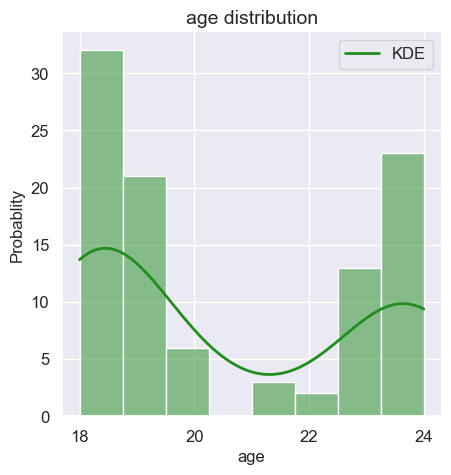

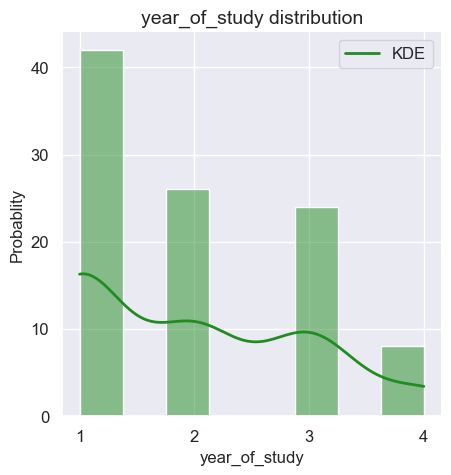

In [256]:
# visualize the distribution for each varieble
plt.figure(figsize=(12,24))

# visualize distributions of numerical columns
for i, col in enumerate(num_col.columns):
    # Creates separate displots for each column
    sns.displot(num_col[col], kde=True, color="forestgreen",
                line_kws={'color': 'indianred', 'lw': 2})
    # Changes labels of the graph
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12});

In [273]:
# look at the statics of each column
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100.0,20.53,2.496280,18.0,18.0,19.0,23.0,24.0
year_of_study,100.0,1.98,0.994734,1.0,1.0,2.0,3.0,4.0


In [274]:
# look at the statistics now by average age
num_col[num_col['age'] == 20].describe().T

,count,mean,std,min,25%,50%,75%,max
age,6.0,20.000000,0.000000,20.0,20.0,20.0,20.00,20.0
year_of_study,6.0,2.166667,0.752773,1.0,2.0,2.0,2.75,3.0


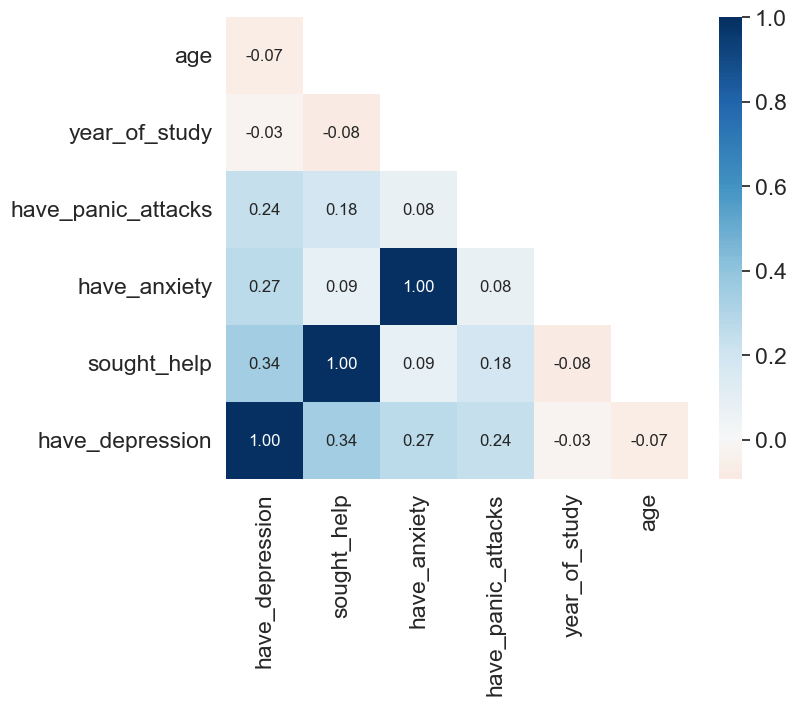

In [279]:
# I want to see the correlation of having a certain mental illness so I will list them below
# makes the copy 
mental_corr = num_col.copy()

# add columns  in the mental_corr to be plot
columns_to_add = ['have_depression', 'have_anxiety','have_panic_attacks','sought_help']

for col in columns_to_add:
    mental_corr[col] = mental_health_df[col].values

corr = mental_corr.corr().sort_values('have_depression', axis=1, ascending=False)
corr = corr.sort_values('have_depression', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.age.min(), 
                        vmax=corr.drop(['have_depression'], axis=0).age.max(),
                        square=True, annot=True, fmt='.2f',
                        center=0, cmap='RdBu',annot_kws={"size": 12})


In [280]:
# get the categorical variables 
cat_cols = pd.DataFrame(mental_health_df[mental_health_df.select_dtypes(include=['object']).columns])
# Drop time and date 
cat_cols = cat_cols.drop(['time', 'date'], axis = 1)

cat_cols.columns

Index(['gender', 'major', 'gpa'], dtype='object')

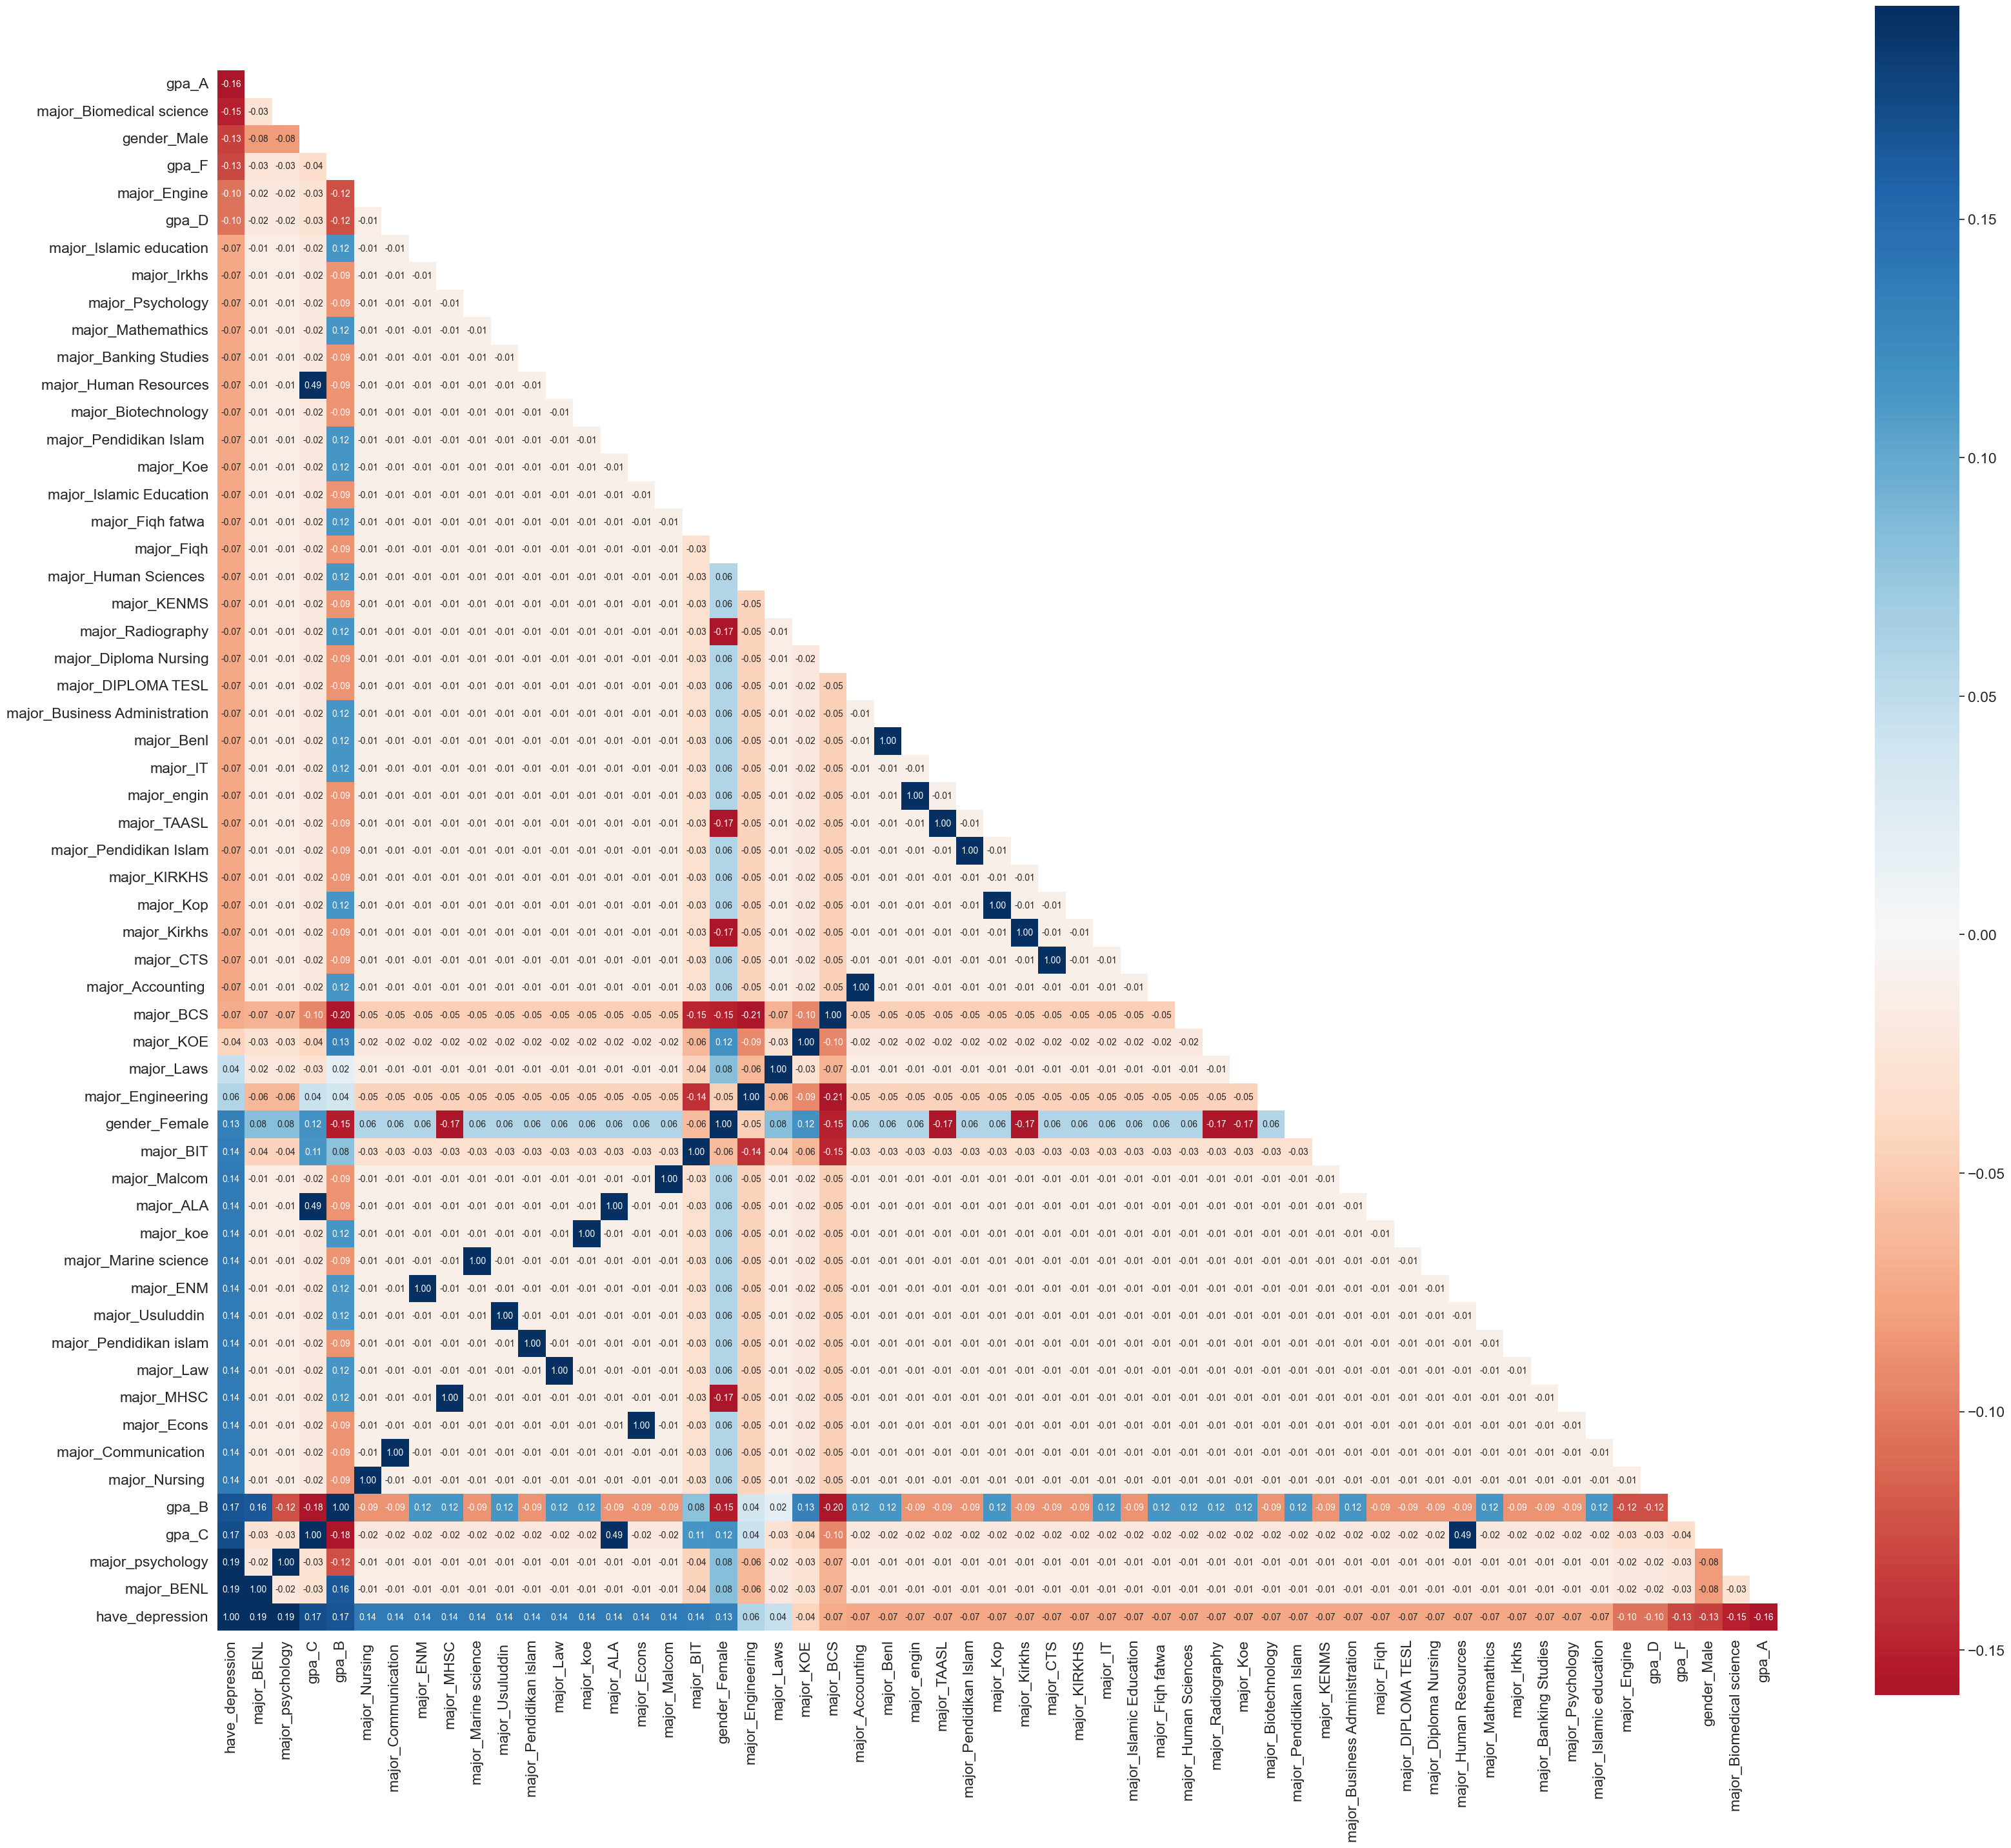

In [282]:
# one hot encode the categorical variables
encoded_cat_cols = pd.get_dummies(cat_cols, dtype=int)

# show the corelation with the categorical values 
cat_cols_corr = pd.concat([encoded_cat_cols, mental_health_df['have_depression']], axis=1)
corr = cat_cols_corr.corr().sort_values('have_depression', axis=1, ascending=False)
corr = corr.sort_values('have_depression', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(39, 34))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.have_depression.min(), 
                        vmax=corr.drop(['have_depression'], axis=0).have_depression.max(), 
                        square=True, annot=True, fmt='.2f',
                        center=0, cmap='RdBu',annot_kws={"size": 10})

In [298]:
# scale the numeric columns
sc = StandardScaler()
num_col_scaled = pd.DataFrame(sc.fit_transform(num_col), columns = num_col.columns)

In [284]:
# concat the numerical and one hot encoded variables
# resex index for both numerical scaled and encoded categorical so additional rows are not introduced after concatenation
num_col_scaled.reset_index(drop=True, inplace=True)
encoded_cat_cols.reset_index(drop=True, inplace=True)

mental_health_df_new = pd.concat([num_col_scaled, encoded_cat_cols], axis = 1)

In [285]:
# check the cleaned dataset size 
print ('The cleaned dataset has {} rows and {} columns'.format(mental_health_df_new.shape[0], 
                                                                mental_health_df_new.shape[1]))
print ('The cleaned dataset has {} numerical features and {} categorical features'
        .format(len(num_col_scaled.columns)-1, len(encoded_cat_cols.columns)))

The cleaned dataset has 100 rows and 58 columns
The cleaned dataset has 1 numerical features and 56 categorical features


In [286]:
# check percentage of records where loan_status = 1
mental_health_df.loc[:, 'age'].sum() / mental_health_df.shape[0] * 100

2053.0

In [293]:
# split target/features into two separate datasets. Split into train/test 
target = mental_health_df['have_depression']
features = mental_health_df_new
# build the training/ testing model 
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, random_state = 42, test_size = 0.25)

#seperates data by random sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [294]:
print(f"The train dataset (no resampling) has: {len(y_train)}")
print(f'The train dataset (Random Resampling) has: {len(X_train_ros)}')
print(f'The test dataset has: {len(y_test)}')

The train dataset (no resampling) has: 75
The train dataset (Random Resampling) has: 92
The test dataset has: 25


In [295]:
# create model function - the train and test datasets will be the same for all models
def model_assess(model, name = "Default"): 
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    preds_proba = model.predict(x_test)

    print(classification_report(y_test, model.predict(x_test)))

In [296]:
# logistic regression performance with scaled data
lg = LogisticRegression(random_state=42)
model_assess(lg, 'Logistic Regression')

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



F1 Score: 0.76


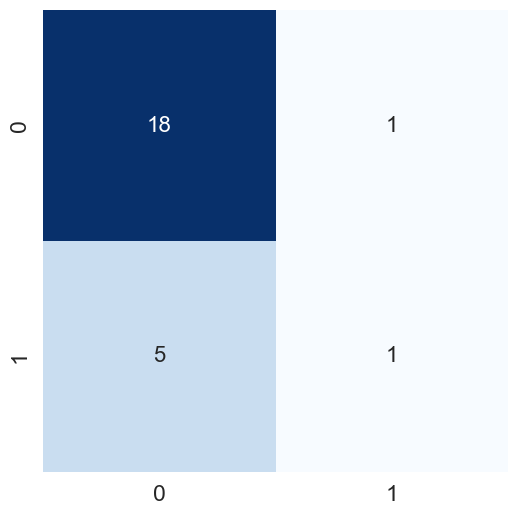

In [297]:
# confusion matrix
cm = confusion_matrix(y_test, lg.predict(x_test))

# adjusts the figure and then plots it 
plt.figure(figsize=(6,6))
sns.set_theme(font_scale=1.5) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False);

# Received an error that teh targe is multiclass and take the micro average because I want to know the accuracy of the model
f1_test = f1_score(y_test, lg.predict(x_test), average= 'micro')
print(f'F1 Score: {f1_test}')